# 야후 파이낸스

http://finance.yahoo.com

http://finance.yahoo.com/q?s=005930.KS

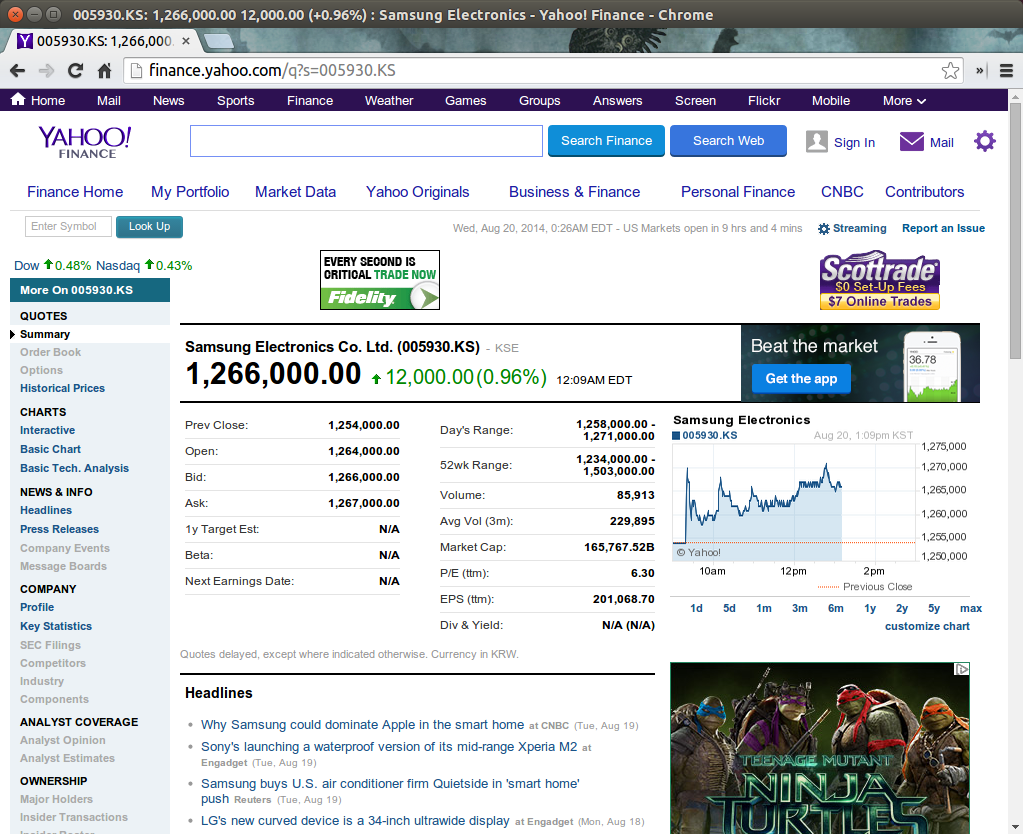

In [14]:
from IPython.display import display, Image
Image('images/yahoo-finance-home.png', width=600)

# 야후 API

필요한 종목(symbol)의 데이터를 CSV로 다운로드 하기

http://download.finance.yahoo.com/d/quotes.csv?s={심볼}&f=[필요-데이터-지정]

혹은,

http://finance.yahoo.com/d/quotes.csv?s={심볼}&f={필요-데이터-지정}

예를 들어, 

http://finance.yahoo.com/d/quotes.csv?s=GOOG&f=nab

GOOG은 종목, nab는 각각 
* n(name, 이름)
* a(ask, 매도호가)
* b(bid, 매수호가)

In [17]:
import requests

r = requests.get('http://finance.yahoo.com/d/quotes.csv?s=GOOG&f=nab')
r.text

'"Alphabet Inc.",752.49,749.55\n'

# 여러 종목을 한번에

In [84]:
sym = '005930.KS+AAPL+GOOG+MSFT'
data = 'naby'

url = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s' % (sym, data)
r  = requests.get(url)
display( r.text )

'"Samsung Electronics",1279000.00,1278000.00,N/A\n"Apple Inc.",110.02,109.99,1.90\n"Alphabet Inc.",752.49,749.55,N/A\n"Microsoft Corporation",55.49,55.41,2.62\n'

In [85]:
sym = '005930.KS+AAPL+GOOG+MSFT'
data = 't6'

url = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s' % (sym, data)
r  = requests.get(url)
r.text

'N/A\nN/A\nN/A\nN/A\n'

In [86]:
# 사용할 수 있는 tag. 상세한 내용은 
# [구글 닥스] https://goo.gl/r541SK 야후 CSV API 태그 참조

tags = 'ydb2r1b3qpoc1d1cd2c6t1k2p2c8m5c3m6gm7hm8k1m3lm4l1t8w1g1w4g3p' \
          '1g4mg5m2g6kvjj1j5j3k4f6j6nk5n4ws1xj2va5b6k3t7a2t615l2el3e7v1' \
          'e8v7e9s6b4j4p5p6rr2r5r6r7s7'
        
sym = 'AAPL'
url = 'http://finance.yahoo.com/d/quotes.csv?s=%s&f=%s' % (sym, tags)
r  = requests.get(url)
r.text    

'1.90,2.08,N/A,"2/11/2016",N/A,"2/4/2016",108.99,108.78,+1.00,"4/1/2016","+1.00 - +0.92%",N/A,N/A,"4:00pm",N/A,"+0.92%",N/A,2.19,N/A,+2.03%,108.20,8.37,110.00,+8.24%,N/A,101.62,"4:00pm - <b>109.99</b>",107.80,109.99,134.35,N/A,N/A,N/A,N/A,N/A,N/A,"108.20 - 110.00",N/A,N/A,N/A,134.54,25873950,92.00,609.85B,17.99,N/A,-24.55,5541034000,+19.55%,"Apple Inc.",-18.25%,N/A,"92.00 - 134.54",N/A,"NMS",5544583000,25873950,2000,2000,2177557,N/A,46038500,N/A,N/A,N/A,9.40,N/A,9.08,N/A,10.02,N/A,1.78,234.99B,23.13,82.79B,2.57,4.71,11.70,N/A,1.04,12.11,10.98,1.47\n'

## 야후 파이낸스 Historical Prices (csv)

삼성전자(005930.KS) 2015년 일별 주가

In [87]:
url = 'http://real-chart.finance.yahoo.com/table.csv?'
param = 's=005930.KS&a=0&b=1&c=2015&d=11&e=31&f=2015&g=d'

r  = requests.get(url + param)

## URL parameters
<table align="left">
<tr><th>키</th><th>설명</th><th>값</th><th>예제</th></tr>
<tr><td>s</td><td>종목(심볼)</td><td>005930.KS</td><td>Samsung Electronics Co. Ltd.</td></tr>
<tr><td>a</td><td>시작 월</td><td>0</td><td>1월 (0부터 시작)</td></tr>
<tr><td>b</td><td>시작 일</td><td>1</td><td></td></tr>
<tr><td>c</td><td>시작 년</td><td>2015</td><td></td></tr>
<tr><td>d</td><td>끝 월</td><td>11</td><td>12월 (0부터 시작)</td></tr>
<tr><td>e</td><td>끝 일</td><td>31</td><td></td></tr>
<tr><td>f</td><td>끝 년</td><td>2015</td><td></td></tr>
<tr><td>g</td><td>기간</td><td>d:일, w :주, m:월</td><td>v:'배당'만 표시</td></tr>
</table>

In [88]:
url = 'http://real-chart.finance.yahoo.com/table.csv?'
param = 's=%5EKS11&a=0&b=1&c=2015&d=11&e=30&f=2015&g=d&ignore=.csv'

r = requests.get(url+param)
for row in r.text.split('\n')[:10]:
    print (row)

Date,Open,High,Low,Close,Volume,Adj Close
2015-12-30,1973.030029,1974.670044,1958.780029,1961.310059,304500,1961.310059
2015-12-29,1956.48999,1968.569946,1946.209961,1966.310059,401400,1966.310059
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,396600,1964.060059
2015-12-24,2009.339966,2009.98999,1990.650024,1990.650024,504600,1990.650024
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,502400,1999.219971
2015-12-22,1984.369995,1992.719971,1971.319946,1992.560059,577200,1992.560059
2015-12-21,1974.26001,1986.660034,1968.140015,1981.189941,539600,1981.189941
2015-12-18,1960.319946,1981.420044,1958.119995,1975.319946,677700,1975.319946
2015-12-17,1984.060059,1987.829956,1967.640015,1977.959961,379600,1977.959961


# DataFrame()으로 읽기

In [89]:
df = pd.read_csv(url + param)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-30,1973.030029,1974.670044,1958.780029,1961.310059,304500,1961.310059
1,2015-12-29,1956.489990,1968.569946,1946.209961,1966.310059,401400,1966.310059
2,2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,396600,1964.060059
3,2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,504600,1990.650024
4,2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,502400,1999.219971


In [90]:
print (df.columns)
print (df.dtypes)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object


In [91]:
pd.to_datetime(df['Date']) #  datetime 컬럼으로 변환
df = df.set_index('Date') # 인덱스 컬럼 지정
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-30,1973.030029,1974.670044,1958.780029,1961.310059,304500,1961.310059
2015-12-29,1956.489990,1968.569946,1946.209961,1966.310059,401400,1966.310059
2015-12-28,1990.589966,1991.189941,1964.060059,1964.060059,396600,1964.060059
2015-12-24,2009.339966,2009.989990,1990.650024,1990.650024,504600,1990.650024
2015-12-23,1994.199951,2007.420044,1989.300049,1999.219971,502400,1999.219971


# read_csv()에서 한번에 지정 (Date, Index)

In [97]:
df = pd.read_csv(url + param, index_col='Date', parse_dates={'Date'})
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,1327000,1327000,1327000,1327000,0,1305014.42
2014-12-30,1330000,1335000,1321000,1327000,212900,1305014.42
2014-12-29,1345000,1347000,1329000,1329000,192700,1306981.28
2014-12-26,1343000,1355000,1343000,1352000,229700,1310423.29
2014-12-25,1343000,1343000,1343000,1343000,0,1301700.06


In [98]:
%matplotlib inline

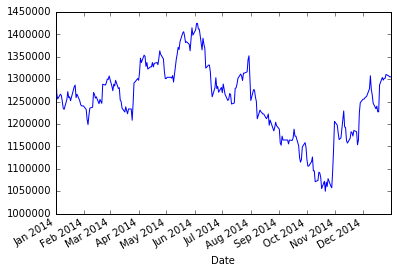

In [99]:
import pandas as pd

url = 'http://real-chart.finance.yahoo.com/table.csv?'
param = 's=005930.KS&a=0&b=1&c=2014&d=11&e=31&f=2014&g=d'

df = pd.read_csv(url + param, index_col='Date', parse_dates={'Date'})
df['Adj Close'].plot()

## DataFrame.read_csv() 에서 인덱스와 시간 문자열 지정
```pytyhon
DataFrame.read_csv(f, index_col='Date', parse_dates={'Date'})
```

In [100]:
url = 'http://real-chart.finance.yahoo.com/table.csv?'
param = 's=005930.KS&a=0&b=1&c=2015&d=11&e=31&f=2015&g=d'
 
df = pd.read_csv(url + param, index_col='Date', parse_dates={'Date'})
df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,1260000,1260000,1260000,1260000,0,1260000.00
2015-12-30,1260000,1272000,1254000,1260000,203900,1260000.00
2015-12-29,1265000,1266000,1241000,1254000,232900,1254000.00
2015-12-28,1285000,1289000,1266000,1266000,227200,1245999.99
2015-12-25,1285000,1285000,1285000,1285000,0,1264699.83


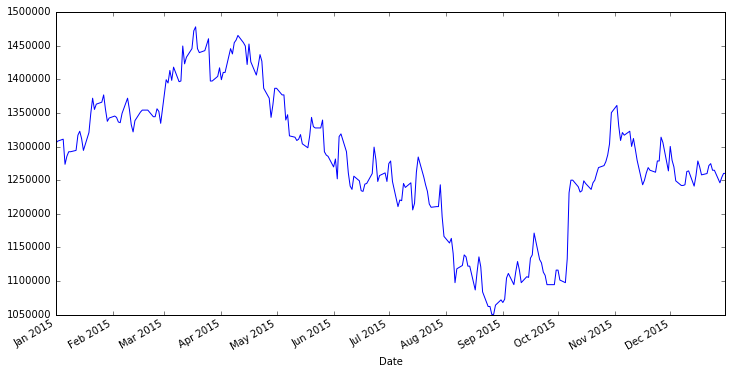

In [101]:
df['Adj Close'].plot(figsize=(12,6))

## DataFrame.plot(), 크기 지정

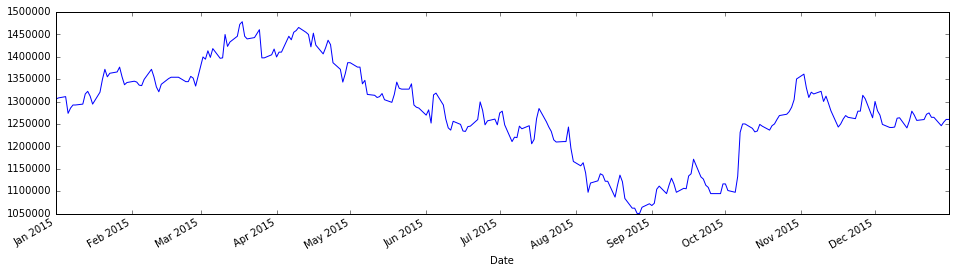

In [102]:
df['Adj Close'].plot(figsize=(16, 4))

## 기간 지정 (하반기)

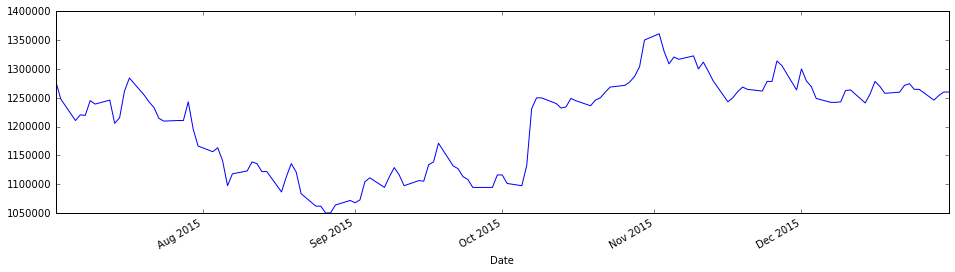

In [103]:
df['2015-12-31':'2015-07-01']['Adj Close'].plot(figsize=(16, 4))

# 리뷰
1. pandas, requests 
1. Yahoo Finance (csv download)
1. requests.get(url)
1. pandas.read_csv()
1. DataFrame.plot()